## **Dikritisasi Data**

Proses dikritisasi adalah proses mengubah data kontinu menjadi data diskrit dengan membaginya ke dalam interval-interval tertentu. Kali ini, kita akan melakukan dikritisasi menggunakan algoritma K-Means clustering pada dataset Iris, kemudian melakukan klasifikasi menggunakan model Naive Bayes dan Decision Tree.

Dataset Iris terdiri dari 4 fitur:

- Sepal Length

- Sepal Width

- Petal Length

- **Petal** Width

## **1.Klastering dan Diskritisasi**

### **Import Library dan Memuat Data**

Pada tahap awal ini, kita mengimpor semua pustaka (library) yang diperlukan. `pandas` digunakan untuk manipulasi data, `sklearn` untuk proses clustering dan pemodelan, sementara `matplotlib` dan `seaborn` untuk visualisasi data.

Selanjutnya, kita memuat dataset `default_iris_combined.csv`. Kita juga menampilkan lima baris pertama (`.head()`) untuk memeriksa struktur dan isi data.

In [9]:
%pip install pandas numpy matplotlib scikit-learn seaborn -q
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Load dan Eksplorasi Data**

Setelah semua alat siap, langkah selanjutnya adalah memuat “bahan baku” kita, yaitu dataset Iris. Kita menggunakan fungsi `read_csv` dari pandas untuk membaca data dari file `default_iris_combined.csv`. Untuk memastikan data telah termuat dengan benar dan untuk mendapatkan gambaran awal tentang strukturnya, kita akan menampilkan lima baris pertama menggunakan fungsi `head()`.

In [11]:
# Load dataset
df = pd.read_csv('/default_iris_combined.csv')

# Menampilkan 5 baris pertama
print("Preview data:")
display(df.head())

# Info dataset
print("\nInformasi dataset:")
display(df.info())

# Statistik deskriptif
print("\nStatistik deskriptif:")
display(df.describe())

Preview data:


,id,class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,1.4,0.2,5.1,3.5
1,2,Iris-setosa,1.4,0.2,4.9,3.0
2,3,Iris-setosa,1.3,0.2,4.7,3.2
3,4,Iris-setosa,1.5,0.2,4.6,3.1
4,5,Iris-setosa,1.4,0.2,5.0,3.6



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   class         150 non-null    object 
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   sepal length  150 non-null    float64
 5   sepal width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None


Statistik deskriptif:


,id,petal length,petal width,sepal length,sepal width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,3.758667,1.198667,5.843333,3.054000
std,43.445368,1.764420,0.763161,0.828066,0.433594
min,1.000000,1.000000,0.100000,4.300000,2.000000
25%,38.250000,1.600000,0.300000,5.100000,2.800000
50%,75.500000,4.350000,1.300000,5.800000,3.000000
75%,112.750000,5.100000,1.800000,6.400000,3.300000
max,150.000000,6.900000,2.500000,7.900000,4.400000


## **Pra-Pemrosesan Awal (Memisahkan Fitur dan Target)**

Penting untuk memisahkan dengan jelas antara data fitur (input, atau `X`) dan data target (output, atau `y`). Di sini, kolom `class` adalah target yang ingin kita prediksi. Kita akan menyimpannya dalam variabel terpisah bernama `y_target`. Kolom `id` tidak memiliki nilai prediktif, jadi kita akan membuangnya bersama dengan kolom `class` untuk membuat DataFrame baru, `df_features`, yang hanya berisi fitur-fitur yang akan kita proses.

In [12]:
# Simpan kolom target (yang ingin diprediksi) ke variabel terpisah
y_target = df['class']

# Buat DataFrame baru yang hanya berisi fitur, dengan membuang kolom 'id' dan 'class'
df_features = df.drop(columns=['id', 'class'])

print("Fitur yang akan diproses:")
df_features.head()

Fitur yang akan diproses:


,petal length,petal width,sepal length,sepal width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


## **Standardisasi Fitur**

Algoritma K-Means bekerja dengan mengukur jarak antar titik data. Jika satu fitur memiliki rentang nilai yang jauh lebih besar dari yang lain (misalnya, puluhan vs. satuan), fitur tersebut akan mendominasi perhitungan jarak. Untuk mencegah hal ini, kita melakukan standardisasi. `StandardScaler` mengubah setiap fitur sehingga memiliki rata-rata (mean) 0 dan standar deviasi 1. Ini menempatkan semua fitur pada skala yang sama, memastikan proses klastering berjalan adil dan tidak bias.

In [13]:
# Pisahkan fitur dari kolom lain
features = ['petal length', 'petal width', 'sepal length', 'sepal width']
df_features = df[features]

# Lakukan standardisasi pada fitur
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=features)

print("Data setelah distandarisasi (5 baris pertama):")
df_scaled.head()

Data setelah distandarisasi (5 baris pertama):


,petal length,petal width,sepal length,sepal width
0,-1.341272,-1.312977,-0.900681,1.032057
1,-1.341272,-1.312977,-1.143017,-0.124958
2,-1.398138,-1.312977,-1.385353,0.337848
3,-1.284407,-1.312977,-1.506521,0.106445
4,-1.341272,-1.312977,-1.021849,1.263460


# **Diskritisasi dengan K-Means**

Ini adalah inti dari proses diskritisasi. Kita akan menerapkan K-Means pada setiap fitur secara individual untuk mengelompokkan nilainya.

- `petal length` & `sepal length` akan dibagi menjadi 4 kelompok (klaster).
- `petal width` & `sepal width` akan dibagi menjadi 3 kelompok.

Setelah K-Means menemukan klaster, kita tidak hanya menggunakan label numerik (0, 1, 2, 3) yang dihasilkannya. Agar lebih intuitif, kita mengurutkan klaster berdasarkan nilai pusatnya (centroid) dan memberinya label abjad (A, B, C, ...). Dengan cara ini, klaster A akan selalu merepresentasikan rentang nilai terendah, B rentang nilai berikutnya, dan seterusnya. Hasilnya kita kumpulkan dalam sebuah DataFrame baru bernama `df_discretized`.

In [14]:
# DataFrame untuk menampung hasil diskritisasi
df_discretized = pd.DataFrame()
# Dictionary untuk menyimpan model kmeans yang sudah dilatih
kmeans_models = {}

# Konfigurasi klaster untuk setiap fitur
config = {
    'petal length': 4,
    'sepal length': 4,
    'petal width': 3,
    'sepal width': 3
}

alphabet_labels = ['A', 'B', 'C', 'D']

for feature, n_clusters in config.items():
    # Ambil data terstandarisasi untuk fitur saat ini
    feature_data = df_scaled[[feature]].values

    # Latih model K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(feature_data)

    # Simpan model untuk digunakan nanti saat visualisasi
    kmeans_models[feature] = kmeans

    # Dapatkan label klaster
    clusters = kmeans.predict(feature_data)

    # Urutkan label abjad berdasarkan nilai centroid
    centroid_order = np.argsort(kmeans.cluster_centers_.flatten())
    cluster_labels = alphabet_labels[:n_clusters]
    label_map = {centroid_order[i]: cluster_labels[i]
                    for i in range(n_clusters)}

    # Tambahkan kolom hasil diskritisasi ke DataFrame
    df_discretized[f'{feature}_cluster'] = pd.Series(clusters).map(label_map)

print("Tabel gabungan hasil diskritisasi:")
df_discretized.head()

Tabel gabungan hasil diskritisasi:


,petal length_cluster,sepal length_cluster,petal width_cluster,sepal width_cluster
0,A,A,A,C
1,A,A,A,B
2,A,A,A,B
3,A,A,A,B
4,A,A,A,C


## **Visualisasi Hasil Cluster**

Kita akan membuat empat plot sebar (scatter plot) 1 dimensi, satu untuk setiap fitur.

* **Sumbu X:** Menampilkan nilai fitur yang sudah terstandarisasi.
* **Sumbu Y:** Dibuat konstan (bernilai 0) agar semua titik data berjajar rapi secara horizontal.
* **Warna:** Setiap titik diwarnai berdasarkan label klaster abjad (A, B, C, D) yang telah kita buat.
* **Centroid:** Pusat dari setiap klaster ditandai dengan simbol ‘X’ berwarna merah. Nilai numerik dari setiap centroid juga ditampilkan tepat di atasnya untuk memberikan informasi yang jelas mengenai lokasi pusat setiap kelompok.

Visualisasi ini secara efektif menunjukkan bagaimana K-Means mempartisi data pada satu dimensi dan di mana letak “pusat gravitasi” dari setiap partisi tersebut.

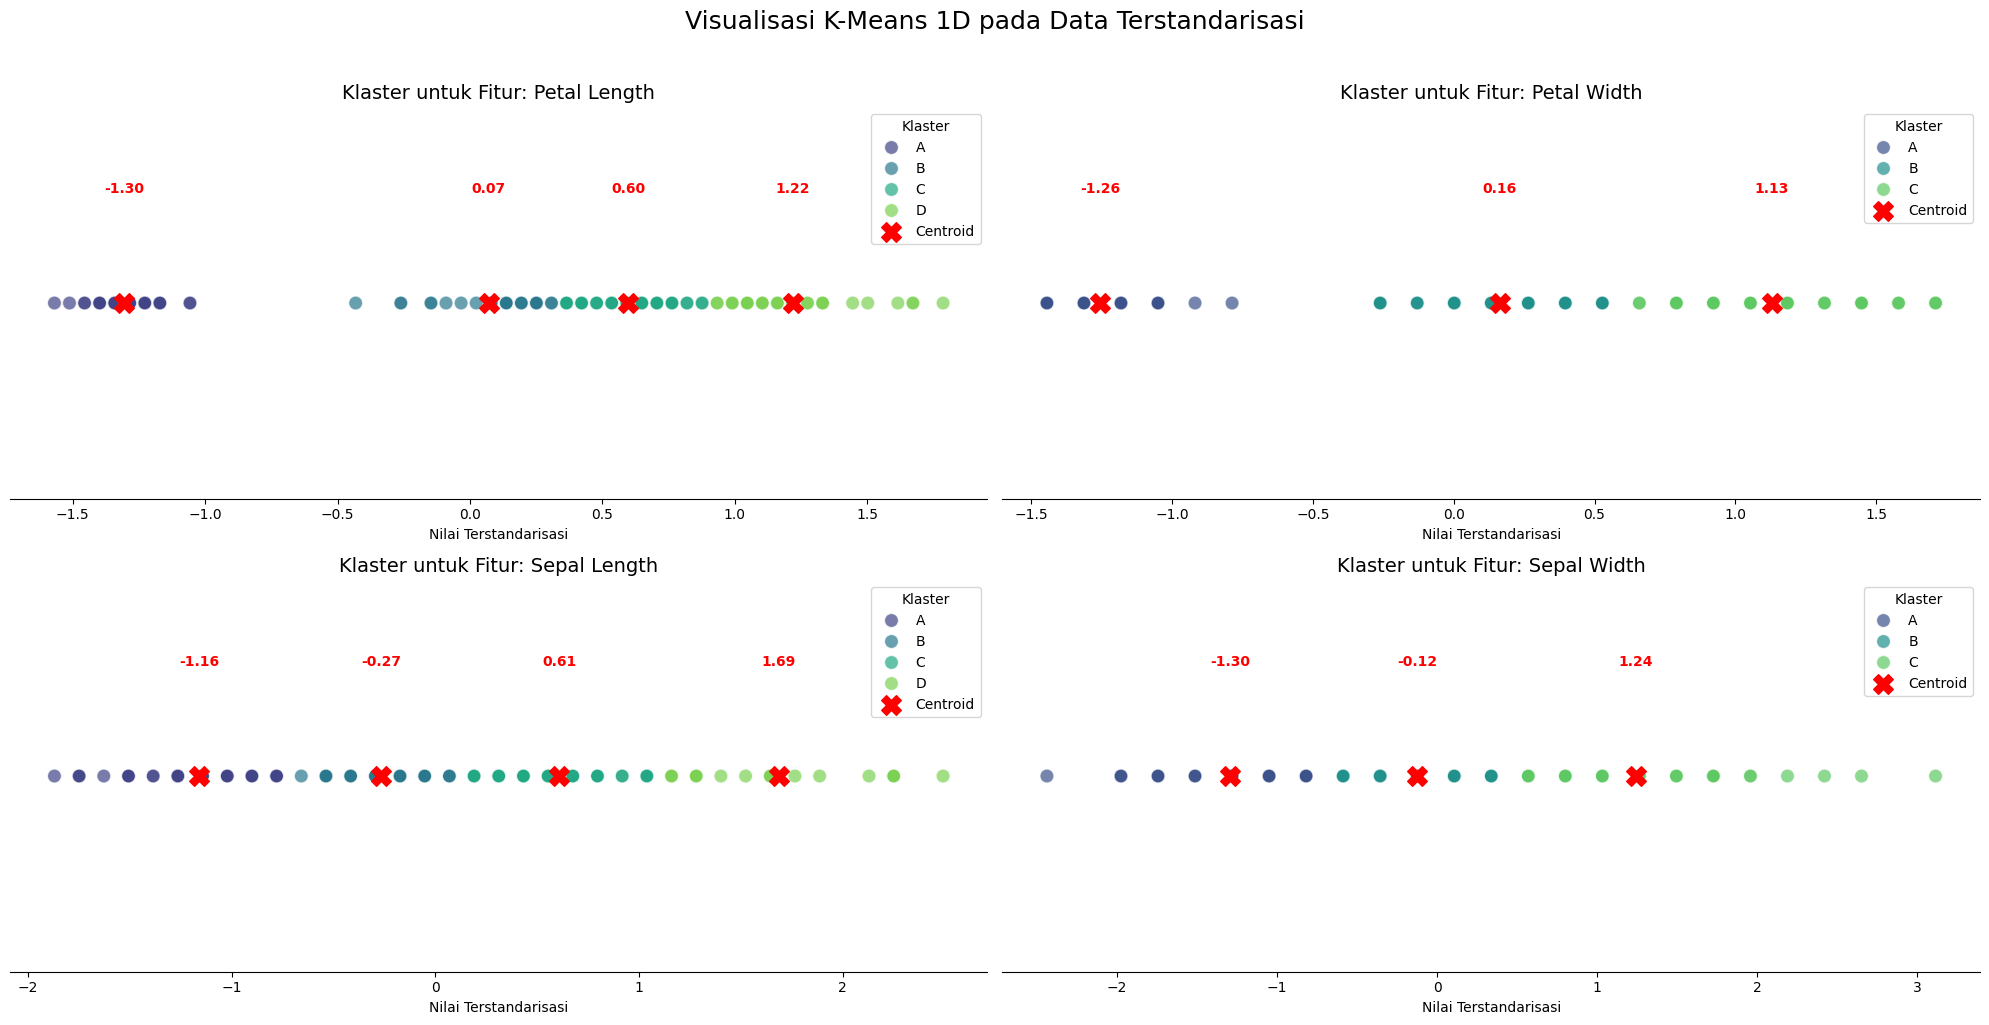

In [15]:
# Siapkan area plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Visualisasi K-Means 1D pada Data Terstandarisasi',
                fontsize=18, y=1.02)
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Ambil data yang relevan
    scaled_values = df_scaled[feature]
    cluster_labels_alpha = df_discretized[f'{feature}_cluster']
    kmeans_model = kmeans_models[feature]
    centroids = kmeans_model.cluster_centers_.flatten()

    # Buat plot sebar 1D
    sns.scatterplot(
        ax=ax,
        x=scaled_values,
        y=np.zeros_like(scaled_values),  # Membuat plot menjadi 1D
        hue=cluster_labels_alpha,
        hue_order=sorted(cluster_labels_alpha.unique()
                            ),  # Urutkan legend A, B, C
        palette='viridis',
        s=100,  # Ukuran titik
        alpha=0.7,
        legend='full'
    )

    # Tandai centroid
    ax.scatter(
        centroids,
        np.zeros_like(centroids),
        marker='X',
        color='red',
        s=200,  # Ukuran marker centroid
        label='Centroid',
        zorder=5  # Pastikan marker di atas titik data
    )

    # Tambahkan teks nilai centroid
    for centroid_val in centroids:
        ax.text(centroid_val, 0.03, f'{centroid_val:.2f}',
                ha='center', va='bottom', color='red', fontsize=10, fontweight='bold')

    ax.set_title(f'Klaster untuk Fitur: {feature.title()}', fontsize=14)
    ax.set_xlabel('Nilai Terstandarisasi')
    ax.set_ylabel('')
    ax.get_yaxis().set_visible(False)  # Sembunyikan sumbu y
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Atur ulang legend
    handles, labels = ax.get_legend_handles_labels()
    # Pastikan 'Centroid' muncul terakhir di legend
    centroid_idx = labels.index('Centroid')
    handles.append(handles.pop(centroid_idx))
    labels.append(labels.pop(centroid_idx))
    ax.legend(handles=handles, labels=labels, title='Klaster')

plt.tight_layout()
plt.show()

# **2. Proses Klasifikasi**

## Menyiapkan Data untuk Klasifikasi (Encoding)

Model machine learning pada umumnya bekerja dengan angka, bukan huruf. Data kita saat ini memiliki fitur dalam bentuk kategori abjad (`A`, `B`, `C`). Oleh karena itu, langkah pertama sebelum klasifikasi adalah mengubah (meng-encode) label-label ini menjadi format numerik.

Kita akan menggunakan `OrdinalEncoder` yang akan mengubah ‘A’ menjadi 0, ‘B’ menjadi 1, dan seterusnya. Ini adalah langkah persiapan wajib agar data bisa diproses oleh model.

In [16]:
# Inisialisasi encoder
encoder = OrdinalEncoder()

# Ubah fitur kategorikal menjadi numerik
X_encoded = encoder.fit_transform(df_discretized)

# Simpan juga target class dari dataframe asli
y_target = df['class']

print("Data setelah di-encode (5 baris pertama):")
print(X_encoded[:5])

Data setelah di-encode (5 baris pertama):
[[0. 0. 0. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 2.]]


## **Membagi Data menjadi Set Latih dan Uji**

Langkah selanjutnya adalah membagi data kita menjadi dua bagian: **data latih** (*training set*) dan **data uji** (*testing set*). Model akan “belajar” dari data latih (80% dari total data), dan kemudian performanya akan diuji pada data uji (sisa 20%) yang belum pernah dilihat sebelumnya. Ini adalah praktik standar untuk mendapatkan evaluasi yang objektif terhadap kemampuan model.

In [17]:
# Bagi data: 80% untuk latih, 20% untuk uji
# stratify=y_target memastikan proporsi kelas di set latih dan uji sama dengan data asli
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_target, test_size=0.2, random_state=42, stratify=y_target
)

print(f"Jumlah data latih: {X_train.shape[0]} sampel")
print(f"Jumlah data uji: {X_test.shape[0]} sampel")

Jumlah data latih: 120 sampel
Jumlah data uji: 30 sampel


## **Melatih dan Mengevaluasi Model**

Sekarang kita tiba pada tahap pemodelan. Kita akan melatih dua model berbeda pada data latih yang sama untuk membandingkan kinerjanya.

* **Decision Tree:** Model ini membuat serangkaian aturan keputusan (seperti pohon) untuk mengklasifikasikan data.
* **Categorical Naive Bayes:** Ini adalah varian dari Naive Bayes yang dirancang khusus untuk fitur yang bersifat kategorikal/diskrit, sangat cocok untuk data kita.

Setelah dilatih, setiap model akan membuat prediksi pada data uji, dan kita akan mengukur akurasi serta menampilkan laporan klasifikasi yang lebih detail.

In [18]:
# --- Model 1: Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# --- Model 2: Categorical Naive Bayes ---
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Akurasi Model Decision Tree: {accuracy_dt:.2%}")
print(f"Akurasi Model Naive Bayes: {accuracy_nb:.2%}")

print("\n" + "="*45)
print("   Laporan Klasifikasi untuk Decision Tree")
print("="*45)
print(classification_report(y_test, y_pred_dt))

print("\n" + "="*45)
print("   Laporan Klasifikasi untuk Naive Bayes")
print("="*45)
print(classification_report(y_test, y_pred_nb))

Akurasi Model Decision Tree: 96.67%
Akurasi Model Naive Bayes: 96.67%

   Laporan Klasifikasi untuk Decision Tree
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


   Laporan Klasifikasi untuk Naive Bayes
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## **Visualisasi Probabilitas Model Naive Bayes**

Model Naive Bayes tidak memiliki “aturan” visual seperti Decision Tree. Model ini bekerja berdasarkan probabilitas. Cara terbaik untuk memvisualisasikannya adalah dengan menampilkan probabilitas bersyarat (conditional probabilities) yang telah dipelajarinya.

Plot di bawah ini akan menunjukkan, untuk setiap fitur (misalnya, petal length):

* Seberapa besar probabilitas sebuah data masuk ke dalam kategori A, B, C, atau D, jika diketahui data tersebut adalah kelas Iris-setosa.
* Hal yang sama diulang untuk kelas Iris-versicolor dan Iris-virginica.

Visualisasi ini memberi kita wawasan tentang fitur mana yang menjadi indikator kuat untuk kelas tertentu menurut model. Misalnya, jika untuk kelas Iris-setosa, probabilitas kategori ‘A’ pada `petal_length_cluster` sangat tinggi, artinya kelopak yang sangat pendek adalah ciri khas dari Iris-setosa.

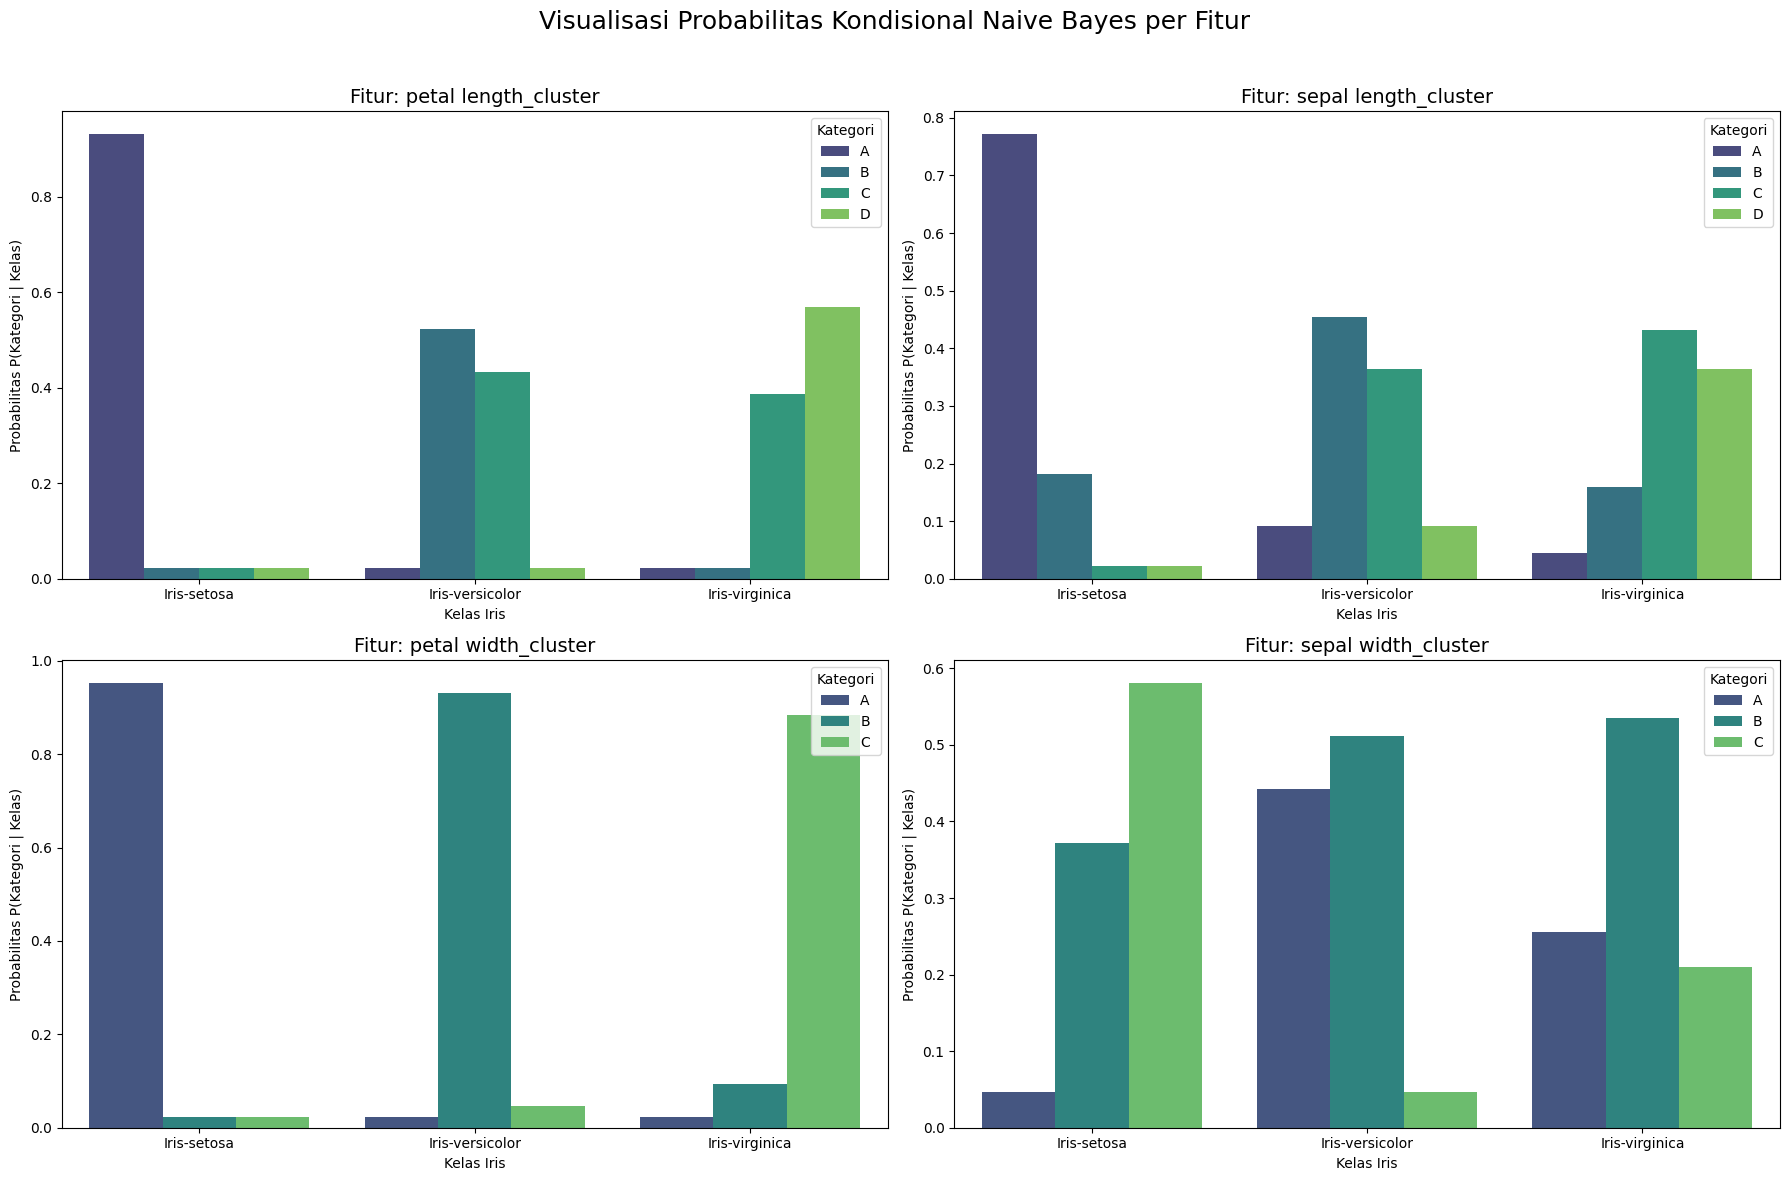

In [20]:
# --- Visualisasi Naive Bayes (Diperbaiki) ---

# Dapatkan log probabilitas dari model. Ini adalah sebuah LIST dari array.
log_probabilities = nb_model.feature_log_prob_

# Terapkan np.exp() ke setiap array di dalam list secara individual
probabilities = [np.exp(p) for p in log_probabilities]

# Dapatkan nama kelas dan fitur
class_names = nb_model.classes_
feature_names = df_discretized.columns

# Siapkan area plot
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle(
    'Visualisasi Probabilitas Kondisional Naive Bayes per Fitur', fontsize=18)
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    ax = axes[i]

    # Dapatkan nama kategori (A, B, C...) untuk fitur ini
    category_names = encoder.categories_[i]

    # Buat dataframe sementara untuk plotting
    # probabilities[i] akan mengambil array probabilitas yang sesuai untuk fitur ke-i
    prob_df = pd.DataFrame(probabilities[i].T, columns=class_names)
    prob_df['Category'] = category_names

    # 'Melt' dataframe untuk membuatnya cocok untuk seaborn barplot
    prob_df = prob_df.melt(
        id_vars='Category', var_name='Class', value_name='Probability')

    # Buat bar plot
    sns.barplot(
        data=prob_df,
        x='Class',
        y='Probability',
        hue='Category',
        ax=ax,
        palette='viridis',
        hue_order=sorted(category_names)  # Pastikan urutan legend benar
    )

    ax.set_title(f'Fitur: {feature}', fontsize=14)
    ax.set_xlabel('Kelas Iris')
    ax.set_ylabel('Probabilitas P(Kategori | Kelas)')
    ax.legend(title='Kategori')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## **Visualisasi Aturan (Rules Plot) pada Decision Tree**

Berbeda dengan Naive Bayes, logika internal dari sebuah Decision Tree dapat digambar secara harfiah sebagai sebuah pohon keputusan. Visualisasi di bawah ini menunjukkan seluruh alur logika yang digunakan model untuk membuat prediksi.

* **Akar (Paling Atas):** Aturan pertama yang membagi data.
* **Cabang & Daun:** Setiap node (kotak) menunjukkan aturan pemisahan, jumlah sampel yang masuk ke node tersebut, dan kelas mayoritas pada titik itu.
* **Warna:** Warna node menunjukkan kelas mayoritas, semakin pekat warnanya, semakin murni node tersebut (semakin yakin modelnya).

Anda dapat menelusuri pohon dari atas ke bawah untuk memahami bagaimana sebuah input akan diklasifikasikan.

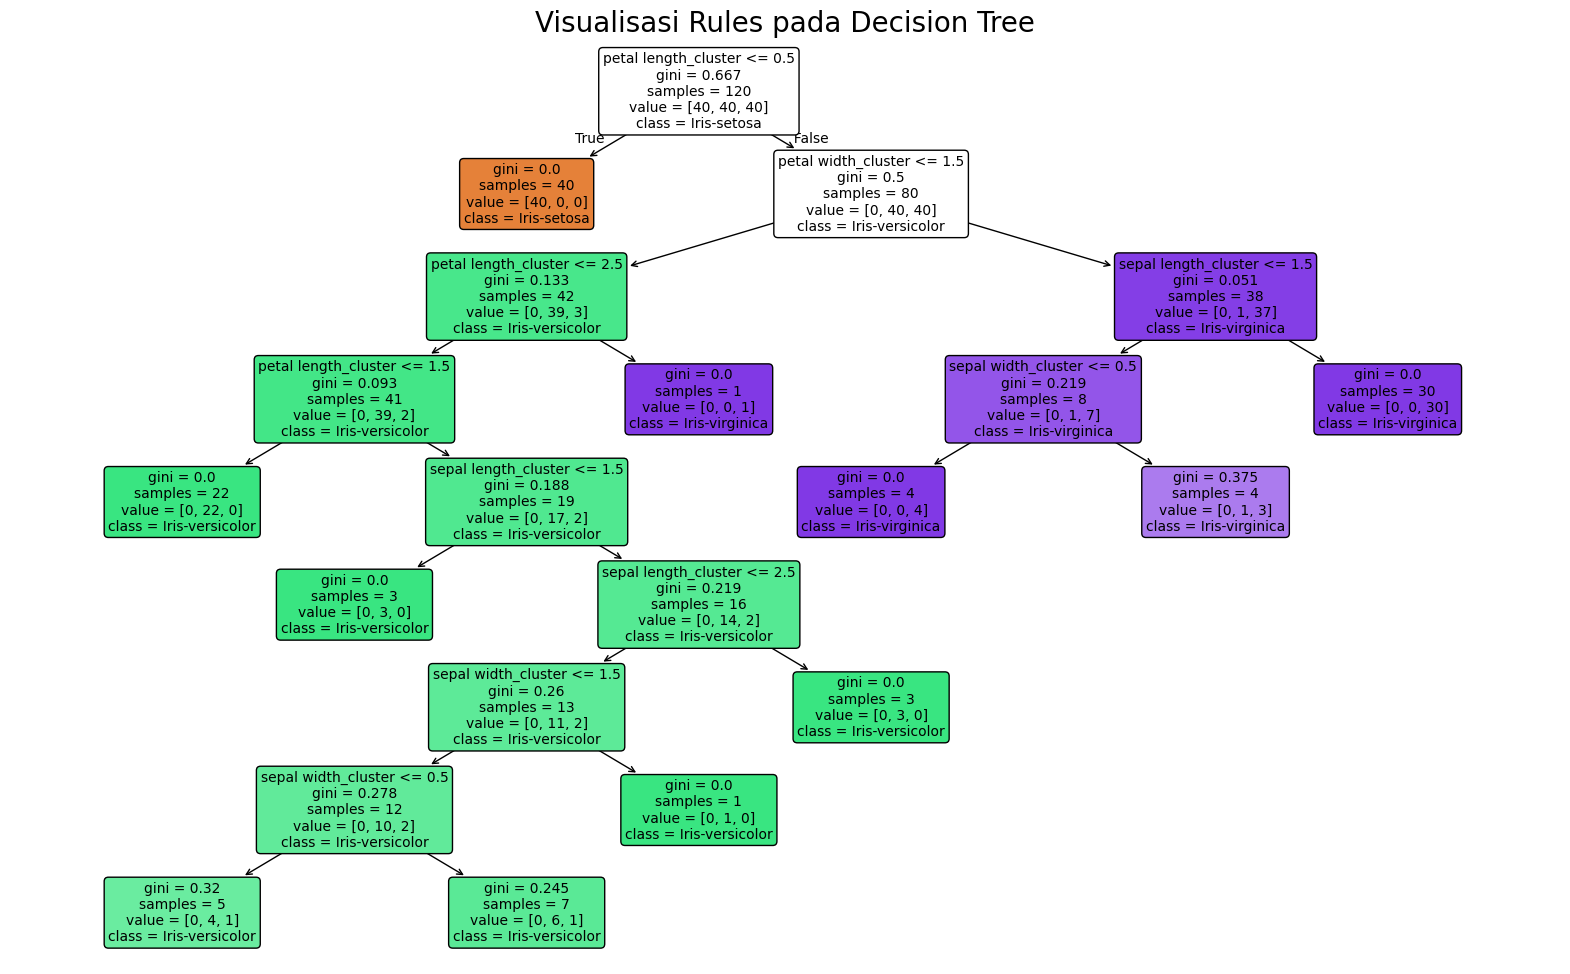

In [21]:
from sklearn.tree import plot_tree

# --- Visualisasi Decision Tree ---

# Siapkan area gambar yang besar agar pohon mudah dibaca
plt.figure(figsize=(20, 12))

# Gunakan fungsi plot_tree untuk menggambar pohon
plot_tree(
    dt_model,
    feature_names=df_discretized.columns,
    class_names=y_target.unique(),
    filled=True,  # Beri warna pada node
    rounded=True,  # Gunakan kotak dengan sudut bulat
    fontsize=10
)

plt.title("Visualisasi Rules pada Decision Tree", fontsize=20)
plt.show()